In [14]:
# import relevant packages
import numpy as np  
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [15]:
import Train

#### Split and Preprocess The Data

In [16]:
x_train, y_train, x_test, y_test = Train.load_mnist()

input_shape = 784
hidden_shape = [512, 512]
output_shape = 10
x_test = x_test.reshape((x_test.shape[0], -1))
y_test = to_categorical(y_test, num_classes=output_shape)

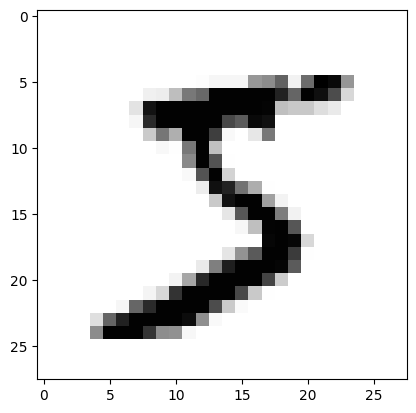

In [17]:
#display the first image of the train set to verify it's all set
first_image = x_train[0]

# Reshaping the image to its original dimensions
first_image = first_image.reshape((28, 28))
plt.imshow(first_image, cmap='Greys', interpolation='None')

## Train The MNIST model

Epoch 0 - Loss: 0.23976772285949358 - Accuracy: 0.10123333333333333
Epoch 10 - Loss: 0.11019449505535485 - Accuracy: 0.7527666666666667
Epoch 20 - Loss: 0.08555491941804456 - Accuracy: 0.7532166666666666
Epoch 30 - Loss: 0.04941642754701829 - Accuracy: 0.8398333333333333
Epoch 40 - Loss: 0.047238853918320944 - Accuracy: 0.8474666666666667
Epoch 50 - Loss: 0.04376540360454115 - Accuracy: 0.86015
Epoch 60 - Loss: 0.04073846691567751 - Accuracy: 0.86975
Epoch 70 - Loss: 0.03916069638438187 - Accuracy: 0.87615
Epoch 80 - Loss: 0.037718538931373835 - Accuracy: 0.8785666666666667
Epoch 90 - Loss: 0.03341111990394734 - Accuracy: 0.895


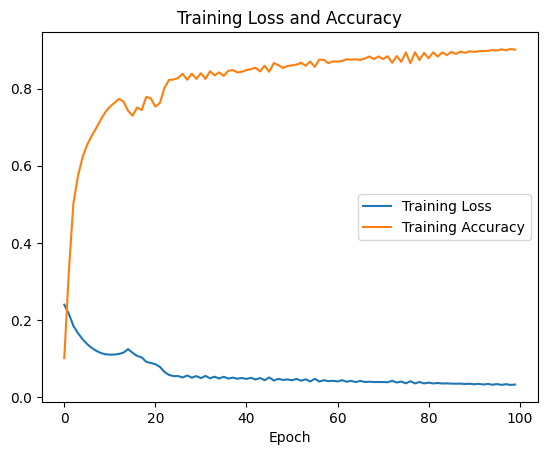

In [5]:
nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.001, n_epochs=100, plot_training_results=True)

#### Evaluate the model on the test 

In [6]:
print("Test Loss:", nn.test_loss(x_test, y_test))
print("Test Accuracy:", nn.test_accuracy(x_test, y_test))

Test Loss: 0.21093847833941964
Test Accuracy: 0.9062


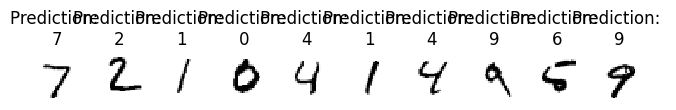

In [11]:
# display some model guesses
model_guesses = nn.get_prediction(samples=x_test)

for idx, i in enumerate([i for i in range(10)]):
# for idx, i in enumerate([0, 5, 10, 15, 20, 25]):
    plt.subplot(1, 10, idx + 1)  # Create subplots in a row
    first_image_guess = model_guesses[i]
    first_image = x_test[i]

    # Reshaping the image to its original dimensions
    first_image = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='Greys', interpolation='None')
    plt.title(f"Prediction: \n{np.argmax(first_image_guess)}")  # Set subplot title
    plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show() 

Epoch 0 - Loss: 0.24170343423889226 - Accuracy: 0.06956666666666667
Epoch 10 - Loss: 0.08754202786405008 - Accuracy: 0.7661666666666667
Epoch 20 - Loss: 0.05639404405471325 - Accuracy: 0.81465
Epoch 30 - Loss: 0.052122550502937 - Accuracy: 0.8347333333333333
Epoch 40 - Loss: 0.04484689747880823 - Accuracy: 0.8577333333333333


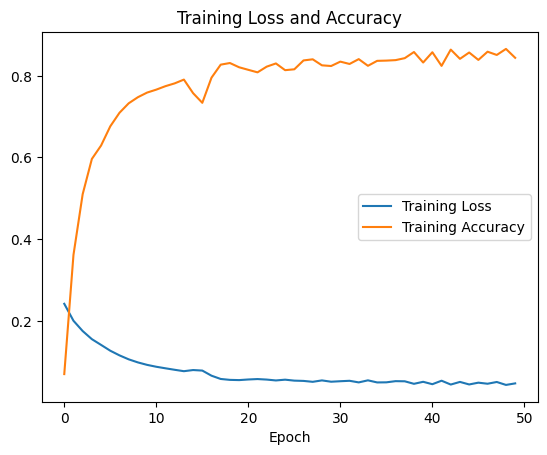

In [9]:
second_nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
second_nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.002, n_epochs=50, plot_training_results=True)

In [13]:
print("Test Loss:", second_nn.test_loss(x_test, y_test))
print("Test Accuracy:", second_nn.test_accuracy(x_test, y_test))

Test Loss: 0.27778831920452335
Test Accuracy: 0.8765


# Private Gradient: first try

 Using Adam + cross entropy.
 For now, is not fully private, because the noise scale is not drove from the epsilon budget. 

Epoch 0 - Loss: 0.23417788592892064 - Accuracy: 0.11246666666666667
Epoch 10 - Loss: 0.11589352121067047 - Accuracy: 0.6923166666666667
Epoch 20 - Loss: 0.04937558751396062 - Accuracy: 0.8637166666666667
Epoch 30 - Loss: 0.048186528188695406 - Accuracy: 0.8529166666666667
Epoch 40 - Loss: 0.043919745299877695 - Accuracy: 0.87155


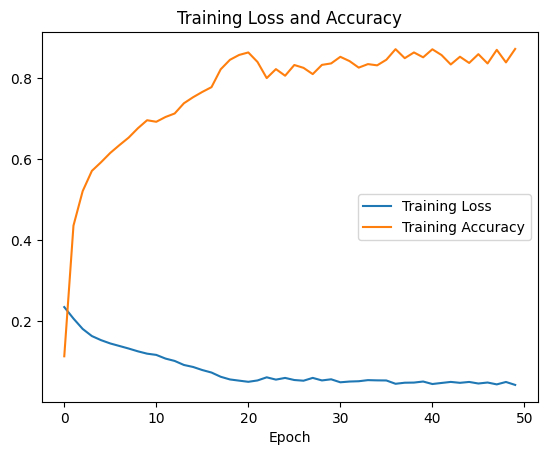

In [18]:
private_gradient = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
private_gradient.train(x_train, y_train, initial_learning_rate=0.001, decay=0.002, n_epochs=50, plot_training_results=True)

In [ ]:
print("Test Loss:", private_gradient.test_loss(x_test, y_test))
print("Test Accuracy:", private_gradient.test_accuracy(x_test, y_test))